In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv('data.csv')
data.isna().sum()

Retailer01    0
Retailer02    0
Retailer03    0
Retailer04    0
Retailer05    0
Retailer06    0
Retailer07    0
Retailer08    0
dtype: int64

In [10]:
data

,Retailer01,Retailer02,Retailer03,Retailer04,Retailer05,Retailer06,Retailer07,Retailer08
0,3,6,1,6,7,6,1,4
1,6,5,6,10,7,5,1,1
2,3,4,8,4,5,7,4,1
3,8,10,5,4,5,9,6,4
4,1,4,9,9,9,6,7,4
...,...,...,...,...,...,...,...,...
49995,1,5,5,8,4,5,7,5
49996,9,8,2,10,8,9,8,3
49997,6,1,6,9,10,7,2,7
49998,4,6,6,1,4,2,3,10


In [11]:
#df['First Season'] = (df['First Season'] > 1990).astype(int)
data=(data>5).astype(int)
## What if it is a criteria data, and we can transform data into 1 and 0 
## Need an explanation to the data
#0 if it is less than 5
## 1 if it is higher than 5

In [12]:
data

,Retailer01,Retailer02,Retailer03,Retailer04,Retailer05,Retailer06,Retailer07,Retailer08
0,0,1,0,1,1,1,0,0
1,1,0,1,1,1,0,0,0
2,0,0,1,0,0,1,0,0
3,1,1,0,0,0,1,1,0
4,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...
49995,0,0,0,1,0,0,1,0
49996,1,1,0,1,1,1,1,0
49997,1,0,1,1,1,1,0,1
49998,0,1,1,0,0,0,0,1


In [13]:
import math
N = 50000
d=8
retailer_selected = []
number_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0,N):
    retailer=0
    max_upper_bound=0
    for i in range(0,d):
        if (number_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
            upper_bound = average_reward + delta_i    
        else: 
            upper_bound = 1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            retailer=i
            
    retailer_selected.append(retailer)
    number_of_selections[retailer]=number_of_selections[retailer]+1
    reward=data.values[n, retailer]
    sums_of_rewards[retailer] = sums_of_rewards[retailer] + reward
    total_reward = total_reward + reward

In [14]:
print("\n\nRewards By Machine = ", sums_of_rewards)
print("\nTotal Rewards by UCB = ", total_reward)




Rewards By Machine =  [2948, 4178, 2649, 1946, 2178, 2878, 4813, 3506]

Total Rewards by UCB =  25096


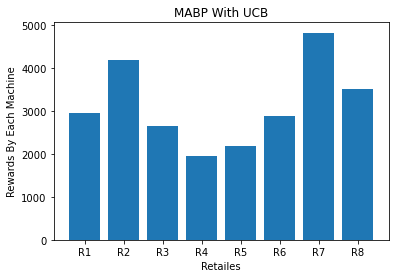

In [15]:
## Visualising the rewards of each machine

plt.bar(['R1','R2','R3','R4','R5','R6','R7','R8'],sums_of_rewards)
plt.title('MABP With UCB')
plt.xlabel('Retailes')
plt.ylabel('Rewards By Each Machine')
plt.show()

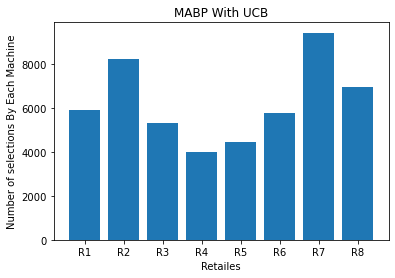

In [17]:
## Visualising the selections of each machine
plt.bar(['R1','R2','R3','R4','R5','R6','R7','R8'],number_of_selections)
plt.title('MABP With UCB')
plt.xlabel('Retailes')
plt.ylabel('Number of selections By Each Machine')
plt.show()

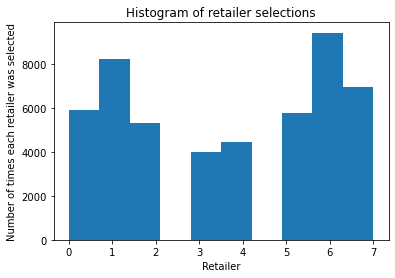

In [16]:
plt.hist(retailer_selected)
plt.title('Histogram of retailer selections')
plt.xlabel('Retailer')
plt.ylabel('Number of times each retailer was selected')
plt.show()